## Comparing Groups in a Sample: The Central Limit Theorem in Action

In [248]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

# True population histogram

In [249]:
def add_mean_and_std(dist, color):
    # Add a vertical line at the mean.
    plt.axvline(dist.mean(), color=color, linestyle='solid', linewidth=2)
    # Add a vertical line at one standard deviation above the mean.
    plt.axvline(dist.mean() + dist.std(), color=color, linestyle='dashed', linewidth=2)
    #Add a vertical line at one standard deviation below the mean.
    plt.axvline(dist.mean() - dist.std(), color=color, linestyle='dashed', linewidth=2)

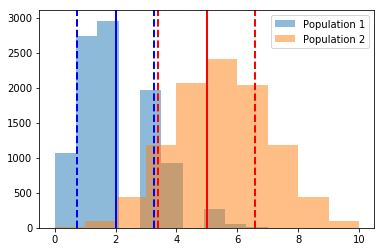

In [250]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

plt.hist(pop1, alpha=0.5, label='Population 1') 
add_mean_and_std(pop1, 'b')
plt.hist(pop2, alpha=0.5, label='Population 2') 
add_mean_and_std(pop2, 'r')
plt.legend(loc='upper right') 
plt.show()

The populations are not normal.

# Histogram of samples 1 and 2

In [251]:
def get_two_samples(pop1, pop2, sample_size):
    sample1 = np.random.choice(pop1, sample_size, replace=True)
    sample2 = np.random.choice(pop2, sample_size, replace=True)
    return sample1, sample2

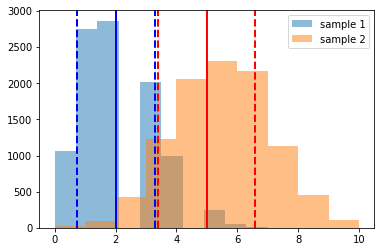

In [258]:
SAMPLE_SIZE = 10000

sample1, sample2 = get_two_samples(pop1, pop2, SAMPLE_SIZE)

plt.hist(sample1, alpha=0.5, label='sample 1')
add_mean_and_std(sample1, 'b')
plt.hist(sample2, alpha=0.5, label='sample 2') 
add_mean_and_std(sample2, 'r')
plt.legend(loc='upper right') 
plt.show()

# 1. Sample means/std converge on true means/std as sample size increases

In [253]:
def plot_mean_and_std_over_sample_size(pop1, pop2):
    sample1_means = []
    sample2_means = []

    sample1_stds = []
    sample2_stds = []
    
    samples_t_stats = []
    samples_p_value = []

    sample_sizes = range(1, 10000, 10)
    for sample_size in sample_sizes:
        sample1, sample2 = get_two_samples(pop1, pop2, sample_size)

        sample1_means += [sample1.mean()]
        sample2_means += [sample2.mean()]

        sample1_stds += [sample1.std()]
        sample2_stds += [sample2.std()]
        
        result = ttest_ind(sample2, sample1, equal_var=False)          
        samples_t_stats += [result.statistic]
        samples_p_value += [result.pvalue]

    plt.scatter(x=sample_sizes, y=sample1_means, label='sample 1 mean', alpha=0.2)
    plt.axhline(pop1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.scatter(x=sample_sizes, y=sample2_means, label='sample 2 mean', alpha=0.2)
    plt.axhline(pop2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title('Convergence of means as sample size increase from 1 to 10,000')
    plt.legend(loc='center right')
    plt.xlabel('Sample size')
    plt.show()

    plt.scatter(x=sample_sizes, y=sample1_stds, label='sample 1 std', alpha=0.2)
    plt.axhline(pop1.std(), color='k', linestyle='dashed', linewidth=1)
    plt.scatter(x=sample_sizes, y=sample2_stds, label='sample 2 std', alpha=0.2)
    plt.axhline(pop2.std(), color='k', linestyle='dashed', linewidth=1)
    plt.title('Convergence of stds as sample size increase from 1 to 10,000')
    plt.xlabel('Sample size')
    plt.legend(loc='center right')
    plt.show()
    
    plt.scatter(x=sample_sizes, y=samples_t_stats, label='t-test', alpha=0.2)
    plt.title('t-test as sample size increase from 1 to 10,000')
    plt.xlabel('Sample size')
    plt.legend(loc='center right')
    plt.ylim([0, 150])
    plt.show()
    
    plt.scatter(x=sample_sizes, y=samples_p_value, label='p-value', alpha=0.2)
    plt.title('p-value as sample size increase from 1 to 10,000')
    plt.xlabel('Sample size')
    plt.legend(loc='center right')
    plt.show()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


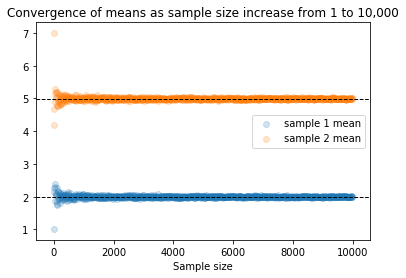

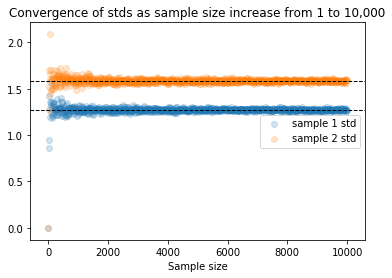

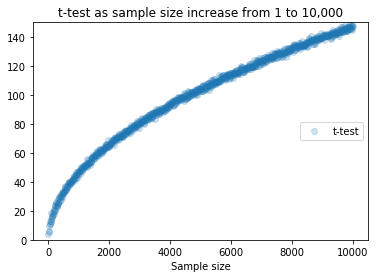

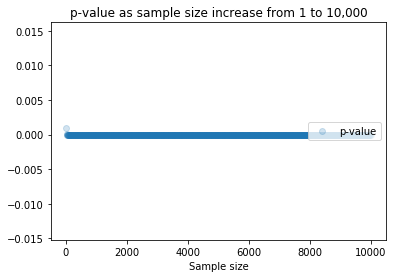

In [254]:
plot_mean_and_std_over_sample_size(pop1, pop2)

# 2. As probability `p` converges for the population distributions, `t-test` value decreases, and `p-value` increase
In other words, as the population means creep closer to each other, unsurprisingly the chance that the two samples __are from different populations__ *goes down*.

## Note that I hold t-test plot's y-range constant for easier comparison

### Change pop1's probability "p" from 0.2 to 0.3

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


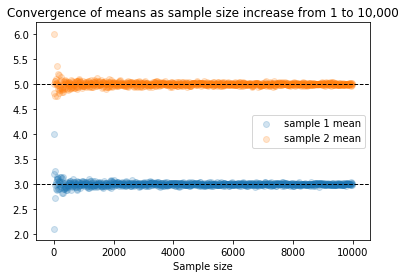

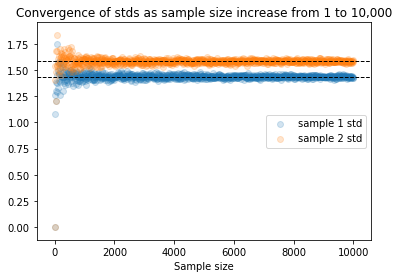

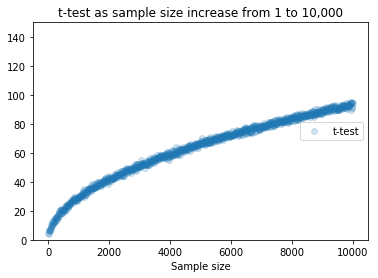

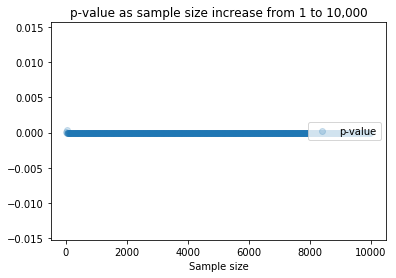

In [255]:
pop1_p_is_point_three = np.random.binomial(10, 0.3, 10000)
plot_mean_and_std_over_sample_size(pop1_p_is_point_three, pop2)

### Change pop1's probability "p" to 0.4

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


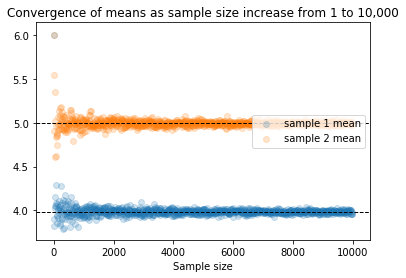

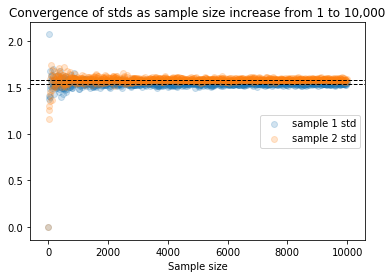

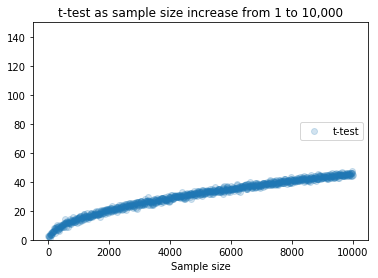

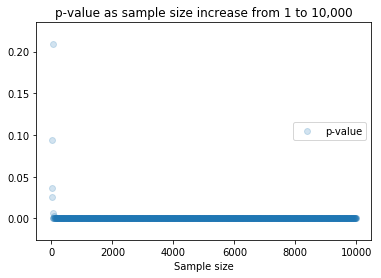

In [256]:
pop1_p_is_point_four = np.random.binomial(10, 0.4, 10000)
plot_mean_and_std_over_sample_size(pop1_p_is_point_four, pop2)

# Histogram of samples 1 and 2

# 3. Changing the Population distribution to Logistic -- sample means remain representative.

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


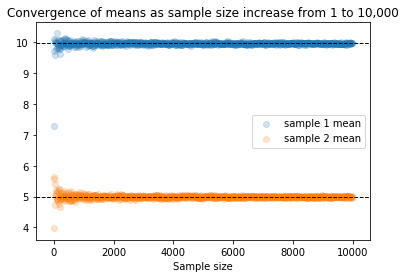

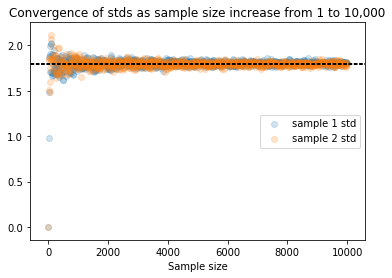

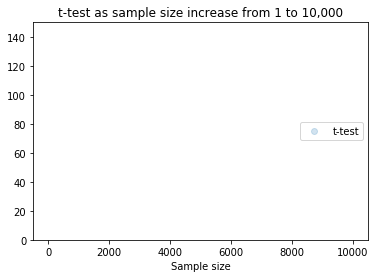

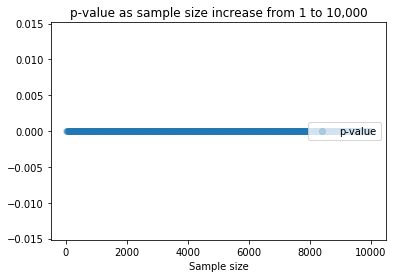

In [257]:
pop1_logistic = np.random.logistic(loc=10, size=10000)
pop2_logistic = np.random.logistic(loc=5, size=10000)
plot_mean_and_std_over_sample_size(pop1_logistic, pop2_logistic)